## test9.ipynb

Compare a ei_network simulation against an equivalent ei_net simulation.

Two simulations are compared. In the first one, an 8x8 grid of E and I units is created using ei_net.
In the second one, the same grid is created as four 4x4 ei_network layers, each covering a "quadrant" of the original grid.

By Sergio Verduzco
January 2018

In [1]:
%cd ..
#import ei_network and ei_net
from ei_network import *
from ei_net import *

/home/z/projects/draculab


### ei_net creation

In [2]:
# Create the ei_net network
net0 = ei_net()

In [3]:
# Set the ei_net parameters
# We homogeneize the connections
for conn in ['ee_conn', 'ei_conn', 'ie_conn', 'ii_conn', 'xe_conn', 'xi_conn']:
    net0.set_param(conn, 'edge_wrap', False)
    net0.set_param(conn, 'mask',  {'circular': {'radius': .3}})
    net0.set_param(conn, 'kernel',  1.)
for conn in ['xe_conn', 'xi_conn']:
    net0.set_param(conn, 'weights', {'linear' : {'c' : 2.5, 'a' : 2.}})
for conn in ['ee_conn', 'ei_conn']:
    net0.set_param(conn, 'weights', {'linear' : {'c' : .5, 'a' : 1.}})
for conn in ['ie_conn', 'ii_conn']:
    net0.set_param(conn, 'weights', {'linear' : {'c' : -.5, 'a' : 1.}})
# Same geometry as the other network
for geom in ['e_geom', 'i_geom', 'x_geom']:
    net0.set_param(geom, 'center', [0., 0.])
    net0.set_param(geom, 'extent', [2., 2.])
    net0.set_param(geom, 'rows', 8)
    net0.set_param(geom, 'columns', 8)
    net0.set_param(geom, 'jitter', 0.)
net0.set_param('x_geom', 'rows', 2)
net0.set_param('x_geom', 'columns', 2)
net0.n['w_track'] = 8
# We remove heterogeneous parameters
for pop in ['e', 'i']:
    for par in ['slope', 'thresh', 'tau', 'init_val']:
        net0.set_param(pop+'_pars', par+'_wid', 0.)

In [4]:
# Build the ei_net network
net0.build()

### ei_network creation

In [5]:
# Create ei_network network
layer_names = ['LD', 'LU', 'RD', 'RU'] # left down, left up, right down, right up
net1 = ei_network(layer_names)

In [6]:
# Configure layer parameters
LD = net1.layers['LD']
LU = net1.layers['LU']
RD = net1.layers['RD']
RU = net1.layers['RU']

centers = ( [-0.5,-0.5], [-0.5, 0.5], [0.5,-0.5], [0.5, 0.5] )
layers = [LD, LU, RD, RU]
for lyr, cntr in zip(layers, centers):
    for geom in ['e_geom', 'i_geom', 'x_geom']:
        lyr.set_param(geom, 'center', cntr)
        lyr.set_param(geom, 'extent', [1., 1.])
        lyr.set_param(geom, 'jitter', 0.)
        lyr.set_param(geom, 'rows', 4)
        lyr.set_param(geom, 'columns', 4)
    # A single input unit per layer, located at the center of the layer
    lyr.set_param('x_geom', 'rows', 1)
    lyr.set_param('x_geom', 'columns', 1)
    # match the connection parameters
    lyr.set_param('ee_conn', 'weights', {'linear' : {'c' : .5, 'a' : 1.}})
    lyr.set_param('ei_conn', 'weights', {'linear' : {'c' : .5, 'a' : 1.}})
    lyr.set_param('ie_conn', 'weights', {'linear' : {'c' : -.5, 'a' : 1.}})
    lyr.set_param('ii_conn', 'weights', {'linear' : {'c' : -.5, 'a' : 1.}})
    lyr.set_param('xe_conn', 'weights', {'linear' : {'c' : 2.5, 'a' : 2.}})
    lyr.set_param('xi_conn', 'weights', {'linear' : {'c' : 2.5, 'a' : 2.}})
    for conn in ['ee_conn', 'ei_conn', 'ie_conn', 'ii_conn', 'xe_conn', 'xi_conn']:
        lyr.set_param(conn, 'edge_wrap', False)
        lyr.set_param(conn, 'mask', {'circular': {'radius': .3}})
        lyr.set_param(conn, 'kernel', 1.)
    lyr.n['w_track'] = 2
    # Remove heterogeneous parameters
    for pop in ['e', 'i']:
        for par in ['slope', 'thresh', 'tau', 'init_val']:
            lyr.set_param(pop+'_pars', par+'_wid', 0.)

In [7]:
# Add interlayer connections
pops = ['e', 'i']
# We'll allow any two populations to connect
for source in layer_names:
    for target in layer_names:
        if source != target:
            for pop1 in pops:
                for pop2 in pops:
                    net1.add_connection((source, pop1), (target, pop2))

In [8]:
# Configure interlayer connections
# I don't need to setup any interlayer transformations, just avoid periodic boundaries
for source in layer_names:
    for target in layer_names:
        if source != target:
            for pop1 in pops:
                for pop2 in pops:
                    net1.set_param(source+pop1+'_'+target+pop2+'_conn', 'edge_wrap', False )
                    net1.set_param(source+pop1+'_'+target+pop2+'_conn', 'mask', {'circular': {'radius': .3}})
                    net1.set_param(source+pop1+'_'+target+pop2+'_conn', 'kernel', 1.)
                    net1.set_param(source+pop1+'_'+target+pop2+'_conn', 'transform', None)
                    if pop1 == 'e':
                        net1.set_param(source+pop1+'_'+target+pop2+'_conn', 'weights',  {'linear' : {'c' : .5, 'a' : 1.}})
                    else:
                        net1.set_param(source+pop1+'_'+target+pop2+'_conn', 'weights',  {'linear' : {'c' : -.5, 'a' : 1.}})

In [9]:
# Build the ei_network network
net1.build()

Building layer LD
Building layer LU
Building layer RD
Building layer RU
Creating LDe_LUe connection
Creating LDe_LUi connection
Creating LDi_LUe connection
Creating LDi_LUi connection
Creating LDe_RDe connection
Creating LDe_RDi connection
Creating LDi_RDe connection
Creating LDi_RDi connection
Creating LDe_RUe connection
Creating LDe_RUi connection
Creating LDi_RUe connection
Creating LDi_RUi connection
Creating LUe_LDe connection
Creating LUe_LDi connection
Creating LUi_LDe connection
Creating LUi_LDi connection
Creating LUe_RDe connection
Creating LUe_RDi connection
Creating LUi_RDe connection
Creating LUi_RDi connection
Creating LUe_RUe connection
Creating LUe_RUi connection
Creating LUi_RUe connection
Creating LUi_RUi connection
Creating RDe_LDe connection
Creating RDe_LDi connection
Creating RDi_LDe connection
Creating RDi_LDi connection
Creating RDe_LUe connection
Creating RDe_LUi connection
Creating RDi_LUe connection
Creating RDi_LUi connection
Creating RDe_RUe connection
Crea

/home/z/projects/draculab/topology.py:390: UserWarning: Zero connections created with topo_connect
  warn('Zero connections created with topo_connect', UserWarning)


### Comparing units and connections before simulation (numerical tests 0 and 1)

In [10]:
# counting units and synapses
# Numerical test 0
nu_n0 = len(net0.net.units)
nu_n1 = len(net1.net.units)
print("UNITS - net0: %d, net1: %d " % (nu_n0, nu_n1))

synsum0 = 0
for slist in net0.net.syns:
    synsum0 += len(slist)
synsum1 = 0
for slist in net1.net.syns:
    synsum1 += len(slist)
print("SYNAPSES - net0 : %d, net1 : %d" % (synsum0, synsum1))

UNITS - net0: 140, net1: 140 
SYNAPSES - net0 : 1184, net1 : 1184


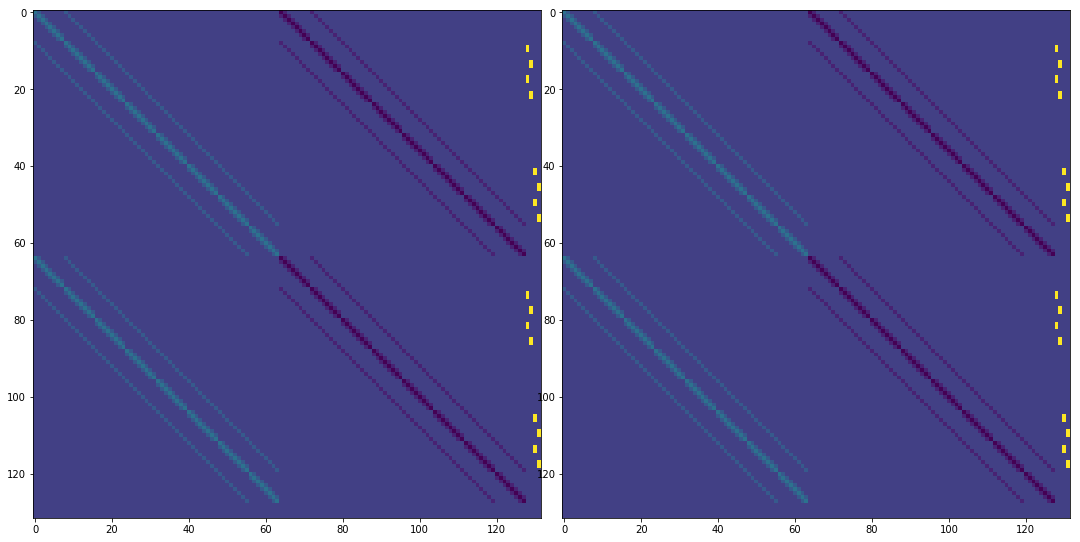

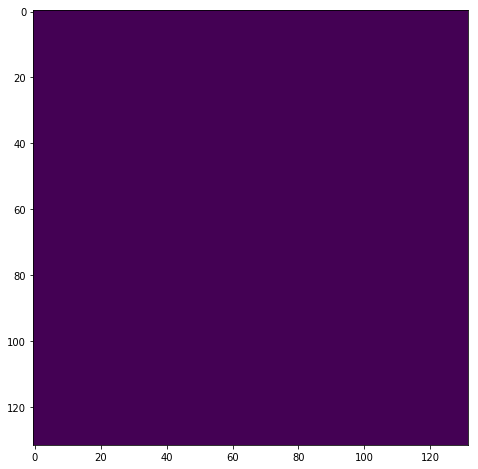

In [11]:
# comparing connection matrices and locations
units0 = net0.e + net0.i + net0.x
e = LD.e+LU.e+RD.e+RU.e 
x = LD.x+LU.x+RD.x+RU.x
i = LD.i+LU.i+RD.i+RU.i
units1 = e+x+i
others0 = [u.ID for u in net0.net.units if u.ID not in units0]
others1 = [u.ID for u in net1.net.units if u.ID not in units1]
n0 = len(units0)
n1 = len(units1)
W0 = np.zeros((n0,n0))
W1 = np.zeros((n1,n1))
if n0 != n1:
    print("Different number of units")
    
for slist in net0.net.syns:
    for syn in slist:
        if syn.postID in units0 and syn.preID in units0:
            W0[syn.postID, syn.preID] = syn.w

# Let's find reorder the units in net1 so they are in the same order as net0
net_map = np.zeros(n0, dtype=int) # from index in units1 to index in units0
coord0 = [ net0.net.units[u].coordinates for u in units0 ]
coord1 = [ net1.net.units[u].coordinates for u in units1 ]
# one unit maps to another if they have the same coordinates and the same group
for idx1 in range(n1):
    found = False
    for idx0 in range(n0):
        if (coord0[idx0] == coord1[idx1]).all():
            if ( (units0[idx0] in net0.e and units1[idx1] in e) or
                 (units0[idx0] in net0.i and units1[idx1] in i) or
                 (units0[idx0] in net0.x and units1[idx1] in x) ): 
                net_map[idx1] = idx0
                found = True
                break
    if not found:
        print("Did not find net0 unit with these coordinates: ", end=' ')
        print(coord1[idx1])
    
for slist in net1.net.syns:
    for syn in slist:
        if syn.postID in units1 and syn.preID in units1:
            post = net_map[units1.index(syn.postID)]
            pre = net_map[units1.index(syn.preID)]
            W1[post, pre] = syn.w

# If there are differences in the connection matrices, print them
# (Numerical test 1)
for row in range(n0):
    for column in range(n0):
        diff = W0[row,column]-W1[row,column]
        if diff != 0:
            print("(%d, %d) = %f" %(row,column,diff))
        
# A figure with the connection matrices
wfig = plt.figure(figsize=(15,10))
ax1 = wfig.add_axes([0.02, 0.01, .47, 0.95], frameon=True, aspect=1) 
ax2 = wfig.add_axes([0.51, 0.01, .47, 0.95], frameon=True, aspect=1) 
ax1.imshow(W0)
ax2.imshow(W1)
# A figure with the difference of the connection matrices
wdiffig = plt.figure(figsize=(8,8))
plt.imshow(W0-W1)
plt.show()

### Running simulations

In [12]:
# Preparing the input pattern functions
def odd_even(pres, rows, cols):
    # if pres is odd, odd-numbered entries activate,
    # if pres is even, even-numbered entries activate
    pat = np.zeros(rows*cols)
    if pres%2 == 1: # if pres is odd
        pat[0:len(pat):2] = 1.
    else: # pres is even
        pat[1:len(pat):2] = 1.
    return pat

def odd(pres, rows, cols):
    # if pres is odd all units activate
    if pres%2 == 1:
        return np.ones(rows*cols)
    else:
        return np.zeros(rows*cols)

def even(pres, rows, cols):
    # if pres is even all units activate
    if pres%2 == 0:
        return np.ones(rows*cols)
    else:
        return np.zeros(rows*cols)

In [13]:
# Running net0 (ei_net)
net0.run(2, .5, set_inp_pat=odd_even)

Presentation 0 took 1.4672882556915283 seconds.
Presentation 1 took 1.3690533638000488 seconds.
Total execution time is 2.8370285034179688 seconds


In [14]:
# Running net1 (ei_network)
inp_pat = {'LD':odd, 'LU':even, 'RD':odd, 'RU':even}
net1.run(2, .5, set_inp_pat=inp_pat)

Starting presentation 0
Presentation 0 took 1.4532897472381592 seconds 
Starting presentation 1
Presentation 1 took 1.365835189819336 seconds 
Total execution time is 2.819777250289917 seconds 
----------------------


### Calculating maximum deviation (numerical test 2)

Maximum deviation: 0.000234


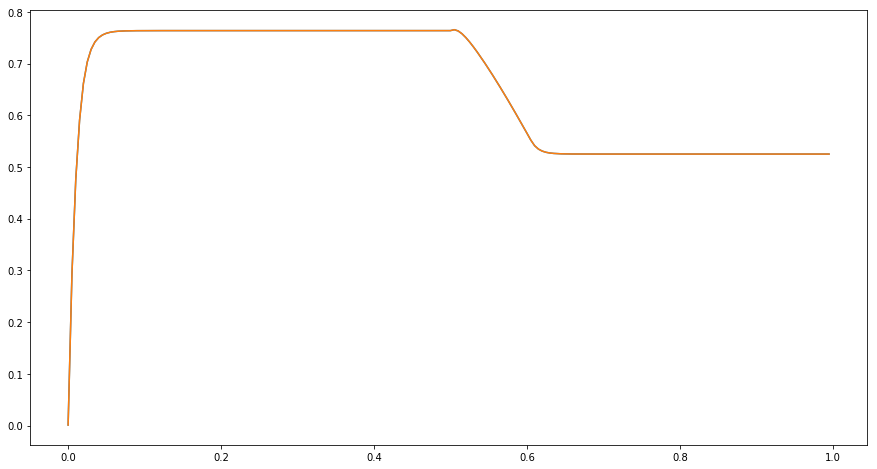

In [15]:
act0 = net0.all_activs[net_map[range(len(units0))]]
act1 = net1.all_activs[units1]
# Numerical test2
# This is the bottom line of the whole program
print("Maximum deviation: %f" % (np.amax(act0-act1)))

dev_fig = plt.figure(figsize=(15,8))
unit = 90
plt.plot(net0.all_times, act0[unit])
plt.plot(net1.all_times, act1[unit])
plt.show()

### More visualizations

In [ ]:
net0.double_anim(net0.e+net0.x, thr=0.5, slider=False)

In [ ]:
net1.double_anim(e+x, thr=0.5, slider=True)

In [ ]:
%matplotlib inline
net1.basic_plot('LD')

In [ ]:
net0.basic_plot()

In [ ]:
# Plot the highest unit activities
%matplotlib inline
n_top = 10  # how many units to plot
top_pop0 = np.array(net0.e)  # population to visualize in net0
top_pop1 = np.array(e)  # population to visualize in net1
top_units0 = net0.all_activs[top_pop0].sum(1).argpartition(-n_top)[-n_top:]
top_units1 = net1.all_activs[top_pop1].sum(1).argpartition(-n_top)[-n_top:]
print(top_units0)
print(top_units1)
top_act_fig0 = plt.figure(figsize=(15,6))
top_acts0 = net0.all_activs[top_pop0[top_units0]].transpose()
plt.plot(net0.all_times, top_acts0)
top_act_fig1 = plt.figure(figsize=(15,6))
top_acts1 = net1.all_activs[top_pop1[top_units1]].transpose()
plt.plot(net1.all_times, top_acts1)
plt.show()

In [ ]:
# Plot the lowest unit activities
n_bottom = 4  # how many units to plot
bottom_pop0 = np.array(net0.e)  # population to visualize in net0
bottom_units0 = net0.all_activs[bottom_pop0].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units0)
bottom_act_fig0 = plt.figure(figsize=(15,6))
bottom_acts0 = net0.all_activs[bottom_pop0[bottom_units0]].transpose()
plt.plot(net0.all_times, bottom_acts0)

bottom_pop1 = np.array(e)  # population to visualize in net0
bottom_units1 = net1.all_activs[bottom_pop1].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units1)
bottom_act_fig1 = plt.figure(figsize=(15,6))
bottom_acts1 = net1.all_activs[bottom_pop1[bottom_units1]].transpose()
plt.plot(net1.all_times, bottom_acts1)

plt.show()

In [ ]:
e = LD.e+LU.e+RD.e+RU.e 
x = LD.x+LU.x+RD.x+RU.x
i = LD.i+LU.i+RD.i+RU.i
net1.conn_anim(e, e, slider=True, weights=True)

In [ ]:
net0.conn_anim(net0.e+net0.x, net0.e, slider=True, weights=True)